In [18]:
import numpy as np
import scipy.integrate as integrate
from matplotlib import pyplot as plt
from scipy.integrate import odeint

#import sympy.solvers.solveset.linsolve as linsolve
from sympy.solvers import solve
from sympy.solvers import solve_poly_system

1 column moist conceptual model

In [2]:
#
# Input paramters
#
#Q_bl = [-1.0, -2.0, -3.0, -4.0, -5.0, -6.0] #K day^-1
Q_ft = -1.0 #K day^-1
Gamma = 5.0 #K km^-1
theta_0 = 298 #K
theta_sfc = 301 #K
A = 0.41
Cd = 0.001
V = 5 #m/s
tau = 15 #min
epsilon = 0.61

theta_sfc = 302 #K GUESS

w_ft = Q_ft/Gamma

Temperature profile at the boundary layer:

$$\frac{\delta\theta_{BL}}{\delta\ t} = \ Q_{BL} + \frac{1}{h}*(\ w_{e}\Delta\theta +\ F_{\theta}) $$


Moisture flux at the boundary layer:

$$ \frac{\delta\ q_{BL}}{\delta\ t} = \frac{1}{h}*(\ w_{e}\Delta\ q +\ F_{q}) $$

Change in BL height:

$$ \frac{h}{\delta\ t} = \ w_{FT} + \ w_e + \ w_m $$

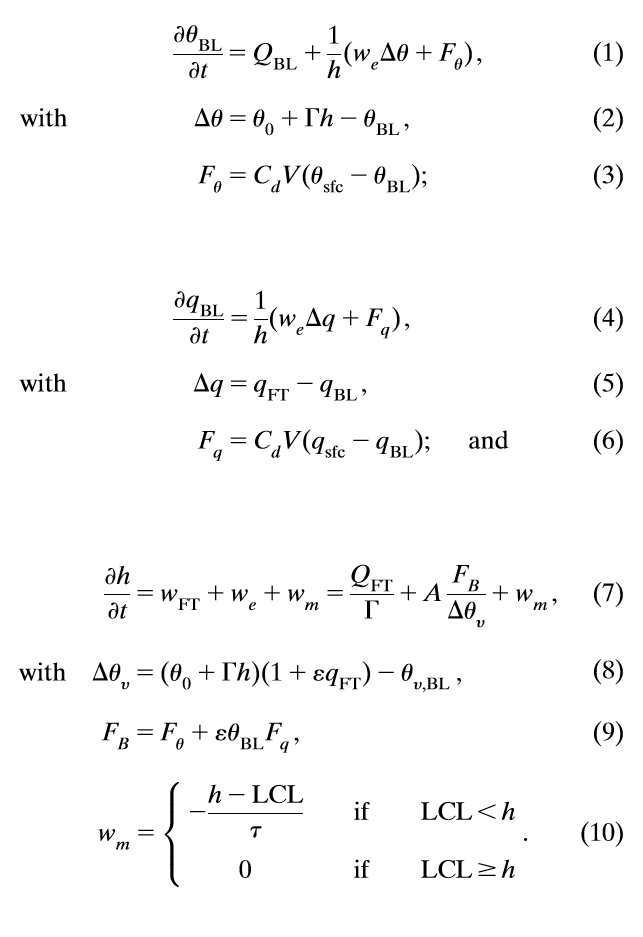
from https://journals.ametsoc.org/doi/pdf/10.1175/JAS-D-18-0226.1

In [51]:
def equations_odeint(P, t):
    #
    #equations are in order of equations seen in figure above
    #
    Q_bl = [1]
    
    P[0] = Q_bl + (1/P[2])*(w_e*delta_theta + F_theta)

    P[1] = (1/P[2])*(w_e*delta_q + F_q)
    
    P[2] = w_ft + w_e + w_m

    
    return(P[0], P[1], P[2])

In [55]:
def solve_equations():
    w_e = A*F_b/delta_theta_v #entrainment velocity
    w_ft = Q_ft/Gamma
    if LCL<h:
        w_m = -(h-LCL)/tau
    else:
        w_m = 0

    F_0 = Cd*V*(theta_sfc - theta_bl)
    delta_theta = theta_0 + Gamma*h - theta_bl
    #d_theta_bl_dt = Q_bl + (1/h)*(w_e*delta_theta + F_theta)

    #dq_bl_dt = (1/h)*(w_e*delta_q + F_q)
    #delta_q = q_FT - q_BL
    delta_q = 3 #g/kg for q_bl >=3 g/kg
    F_q = Cd*V(q_sfc - q_bl)

    #dh_dt =  w_ft + w_e + w_m
    delta_theta_v = (theta_0 + Gamma*h)*(1+ epsilon*q_ft) - theta_v_bl
    F_b = F_theta + epsilon*theta_bl*F_q
    
    #
    # set up solution for ODEs
    #
    tf = 3*3600
    dtout = 600
    dz = 10.
    ztop = 1000.
    tspan = np.arange(0.,tf,dtout)
    zf = np.arange(0.,ztop,dz)
    Q_bl = [-1]
    P0 = [300, 400, 0.2]

    theta_bl, q_bl, h = integrate.odeint(equations_odeint, P0, tspan)
    
    solve_poly_system(theta_bl, q_bl, h, w_e, F_0, delta_theta, )
    
    #return(P[1], P[2], P[4], P[5], P[7], P[8],P[9], P[10])

In [54]:
#
# to start I have used the same P and t inputs as is splineprofiles.py
#

tf = 3*3600
dtout = 600
dz = 10.
ztop = 1000.

#zh = np.arange(dz/2,(ztop-dz/2),dz)
#thetai = 290 + 0.01*zh
tspan = np.arange(0.,tf,dtout)
zf = np.arange(0.,ztop,dz)

Q_bl = [-1]

P0 = [300, 400, 0.2]

#moist_profile=integrate.odeint(equations_odeint, P0, tspan)
#moist_profile.shape
#print(moist_profile)
#plt.plot(moist_profile)

In [21]:
# back up syntax
def backup():
    P[1] = theta_0 + gamma*P[6] - P[0]
    P[2] = Cd*V*(theta_sfc - P[0])
    
    P[4] = q_ft - P[3] #fio what q_ft is
    P[5] = Cd*V*(q_sfc - P[3])
    
    P[7] = (theta_0 + gamma*P[6])*(1+epsilon*q_ft)-theta_v_bl #fio what theta_v_bl is
    P[8] = P[2] + epsilon*P[1]*P[5]
    P[9] = -P[6]-LCL #if LCL<h or 0 if greater
    
    P[10] = A*P[8]/P[7] #equation for w_e
    
    P[0] = Q_bl + (1/P[6])*P[10]*P[1] + P[2]

    P[3] = (1/P[6])*(P[10]*P[4] + P[7])
    
    P[6] = w_ft + P[10] + w_m

    
    return(P[0], P[1], P[2], P[3], P[4], P[5], P[6], P[7], P[8],P[9], P[10])